In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style='darkgrid')

In [88]:
data_table = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')
x = data_table.Altura
y = data_table.Cateter
data_table

,Peso,Altura,Cateter
0,18.140590,1.087122,37.0
1,42.403628,1.612903,50.0
2,16.099773,0.952502,34.0
3,13.605442,1.003302,36.0
4,23.582766,1.155702,43.0
5,7.709751,0.977902,28.0
6,17.460317,1.092202,37.0
7,3.854875,0.571501,20.0
8,14.965986,0.939802,34.0
9,4.308390,0.596901,30.0


In [87]:
#atribuindo dois coeficientes ws arbitrários
import random 
w0, w1 = random.uniform(1,10), random.uniform(1,10)
print('w0: ', w0)
print('w1: ', w1)
#y_inferencias recebe a equação da reta com w arbitrários
y_inf =list(map(lambda i: w0+w1*i,x))
print('funcao custo analitica',funcao_custo(w1,w0))
#Equivalente  a 
from sklearn.metrics import mean_squared_error
print('mean squared error form scikit',mean_squared_error(y_inf,y)/2)

w0:  4.047300682171649
w1:  6.278122801604764
funcao custo analitica 349.39943965339216
mean squared error form scikit 349.39943965339216


In [84]:
#funcao custo
def funcao_custo(w0,w1):
    somatorio=0
    N=len(x)
    for i in range(N):
        e = y[i] - y_inf[i]
        somatorio = somatorio + e**2
    I=somatorio/(2*N)
    return I
def plot_fc():
    plt.plot(fc)
    plt.xlabel('Iterações')
    plt.ylabel('RMS')
    plt.title('Função Custo\n', fontsize=20)
    plt.show()
def plot_lr():
    plt.plot(x,y,'o', color='black')
    plt.plot(x,y_inf,'-',color='red')
    plt.title('Dados\n', fontsize=20)
    plt.xlabel('Altura do paciente (m)')
    plt.ylabel('Tamanho do Cateter (cm)')
    plt.show()

### Como plotar o paraboloide da função custo?

In [ ]:
#QUERO PLOTAR O PARABOLOIDE DO ERRO 
from mpl_toolkits.mplot3d import Axes3D
x1=np.arange(-100,100,0.5)
y1=np.arange(-100,100,0.5)
w0, w1 = random.uniform(1,10), random.uniform(1,10)
y1_inf = list(map(lambda i: w0+w1*i,x1))
#criando coordenadas em 3D
X,Y = np.meshgrid(x1, y1_inf)
#Função a ser plotada U(x,y)
I=[]
for i in range(len(x1)):
    ret=funcao_custo(X[i],y1,Y[i])
    I.append(ret)
#Vinculando a figura as coordenadas 3D
fig = plt.figure()
ax = Axes3D(fig)
#plotando grafico 
ax.plot_surface(X,Y,I)
plt.show()

## ------------------------------------------------------------

In [92]:
#GRADIENTE DESCENDENTE (GD)
def GD(x,y,alpha = random.random()):
    # adotando hiperparametros 
    print('taxa de aprendizagem: ', alpha)
    # critérios
    N = len(x)
    itera = 100
    # adortando parametros
    w0, w1 = random.uniform(1,10), random.uniform(1,10)
    print('w0 inicial: ', w0)
    print('w1 inicial: ', w1)
    fc=[]
    for it in range(itera):
        # y_inferencias recebe a equação da reta com w arbitrários
        y_inf =list(map(lambda i: w0+w1*i,x))
        # atualizando os parametros
        erro=[]
        for n in range(N):
            erro.append(y[n]-y_inf[n])
        w0 = w0 + alpha* (sum(erro)/N)
        w1 = w1 + alpha* (sum(erro*x)/N)
        y_inf =list(map(lambda i: w0+w1*i,x))
        fc.append(funcao_custo(w0,w1))
    plot_lr()
    plot_fc()

taxa de aprendizagem:  0.24316668165493216
w0 inicial:  2.095559705329116
w1 inicial:  4.439192692239409


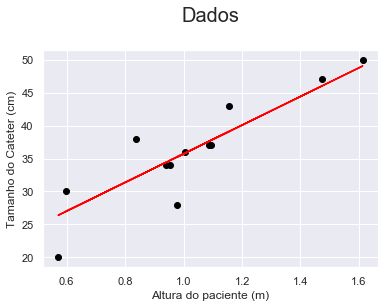

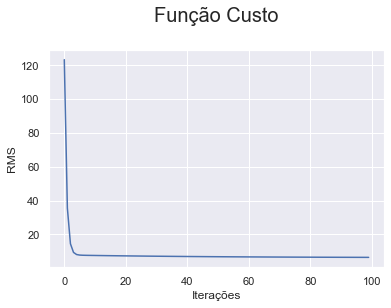

In [93]:
GD(x,y)

### Agora vamos acrescentar uma nova dimensão

In [ ]:
[w1,w2]@X[0]

In [ ]:
#normalizar é pra nao enviesza
#media 0
#std 1
def normalize(X,type_='std'):
    if type_=='std':
        return (X - X.mean(axis=0)) / X.std(axis=0)
    if type_=='zero_one':
        return (X - X.min(axis=0))  / (X.max(axis=0)-X.min(axis=0))

In [ ]:
ndata=normalize(data_table)
ndata

In [ ]:
indice=list(len(ndata))


### Agora implementamos os Métodos 
#### Gradiente Descendente (GD)

In [ ]:
X_norm[0]

In [ ]:
w0=0.001
alpha=0.001
v_rand=np.random.rand(3)
prediction=list(range(len(X)))
for i in range(1,len(X)):
    prediction[i]=v_rand@X_norm[i]
    error=(cateter[i]-prediction[i])
    w0=w0+(alpha/i)*np.sum(error,axis=0)
    
    
    
#yc1=w0+w1x1+w2x2

In [ ]:
np.shape(prediction)

In [ ]:
np.exp(,2)

In [ ]:
np.asanyarray([1,2,3,4])

In [ ]:
def build_poly_regressors(x,poly_order=1):
    poly_regressors=np.hstack((np.ones((x.shape[0],1)),x))
    if poly_order > 1:
        for i in range(2,poly_order,)

In [ ]:
normalize(data_table).mean()

In [ ]:
normalize(data_table).std()

In [ ]:
# Gradiente Descendente 
X = np.random.randn(10,3)
X

In [ ]:
X + X.std(axis=0)

In [ ]:

#  x02.txt
#
#  Reference:
#
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991, page 304,
#    ISBN 0-12-656460-4.
#
#    S Weisberg,
#    Applied Linear Regression,
#    Wiley, 1980, page 218.
#
#  Discussion:
#
#    For 12 young patients, catheters were fed from a principal vein
#    into the heart.  The necessary catheter length was measured.
#    The height and weight of the patients was noted.  
#
#    There are 12 rows of data.  The data columns include:
#
#      I,  the index;
#      A1, the height;
#      A2, the weight;
#      B,  the catheter length.
#
#    We seek a model of the form:
#
#      B = A1 * X1 + A2 * X2.
#
4 columns
12 rows
Index
Patient Height (inches)
Patient Weight (pounds)
Catheter Length (centimeters)
 1  42.8  40.0  37
 2  63.5  93.5  50
 3  37.5  35.5  34
 4  39.5  30.0  36
 5  45.5  52.0  43
 6  38.5  17.0  28
 7  43.0  38.5  37
 8  22.5   8.5  20
 9  37.0  33.0  34
10  23.5   9.5  30
11  33.0  21.0  38
12  58.0  79.0  47

